Критерий	Описание
1. Постановка задачи	Исходная задача описана понятно и ясно
Показана актуальность задачи, ее место в предметной области
Метрики качества решения описаны, приведены их формулы
2. Анализ	Проведено исследование аналогичных решений, они описаны, приведены результаты их применения (если доступно) и ссылки на материалы
Проведен предварительный анализ данных, наглядно описано их качество, аномалии зависимости
Описаны и обоснованы алгоритмы и техники, применяемые для решения задачи, их требования к исходным данным
Приведены ссылки на код анализа данных, код является рабочим и воспроизводит описанные в отчете результаты
3. Методика решения	Описаны шаги преобразования и очистки данных, приведены ссылки на рабочий код, воспроизводящий все описанные шаги
В результате очистки данных найденные ранее аномалии и зависимости устранены или существенно снижены, качество анных повышено
Разделение данных на обучающую и тестовую выборки описано и произведено корректно с учетом структуры данных
Четко описана итоговая модель и ее параметры, приведены ссылки на рабочий код создания и обучения модели
Выбор значений параметров модели обоснован и подтвержден ссылками на внешние источники или рабочим кодом
4. Результаты	Для итоговой модели приведены значения целевых метрик, описано ее качество
Подтверждена работоспособность модели, описано влияние на ее точность различных шумов и выборосов в данных
Приведено сравнение качества итоговой модели с аналогичными решениями (если доступно)
Описана область и результаты внедрения решения исходной задачи (если применимо)
5. Выводы и заключение	Приведены основные выводы по проделанной работе, ключевые пункты визуализированы и четко описаны
Перечислены пути развития и улучшения решения
6. Список источников и презентация	Слушатель продемонстрировал умение грамотно и аргументировано презентовать и защищать результаты работы, в том числе и в процесссе публичной защиты
Отчет имеет хорошую структуру и содержит все разделы
Отчет написан емко, перечислены источники информации, текст отчета содержит корректные цитаты и ссылки

## 1. Постановка задачи

#### Спрогнозировать цену подержанных автомобилей на основе различных характеристик используя методы регрессии. 
Данные взяты с сайта www.kaggle.com...eries-s4e9
Набор данных был сгенерирован на основе модели глубокого обучения, обученной на наборе данных прогнозирования цен на подержанные автомобили. 
Распределение функций близко к оригинальному, но не совсем совпадает с ним.
Данные датасета содержат как цифровые значения, так и категориальные значения, содержат пропуски и позволяют провести полноценный анализ данных, зависимости, возможно провести преобразования данных, очистка данных.



Создание модели линейной регрессии относится к задачам обучения с учителем, цель которых — предсказать значение непрерывной зависимой переменной (y) на основе набора признаков (X).

В качестве метрики качества используется RMSE.
RMSE измеряет разницу между предсказанными значениями и фактическими значениями в единицах ответной переменной.
RMSE рассчитывается как квадратный корень из среднего квадрата различий между предсказанными значениями и фактическими значениями.

In [1]:
# Загружаем необходимые библиотеки 
import warnings
import matplotlib.pyplot as plt
import numpy as np
import optuna
from optuna.samplers import TPESampler
import pandas as pd
import seaborn as sns
import re
from sklearn import metrics
from sklearn.metrics import classification_report, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
import datetime

#### Загружаем данные 

In [2]:
# тренировачные данные
df=pd.read_csv('D:\\ml\\nlp\\cars\\train.csv')
# тестовые данные
dtest=pd.read_csv('D:\\ml\\nlp\\cars\\test.csv')
sample=pd.read_csv('D:\\ml\\nlp\\cars\\sample_submission.csv')
df.shape,dtest.shape,sample.shape

((188533, 13), (125690, 12), (125690, 2))

### 2. Анализ набора данных

In [3]:
df.head(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [5]:
# Удалим столбец id, он нам будет мешать в расчетах
df = df.drop(columns=['id'])
dtest = dtest.drop(columns=['id'])

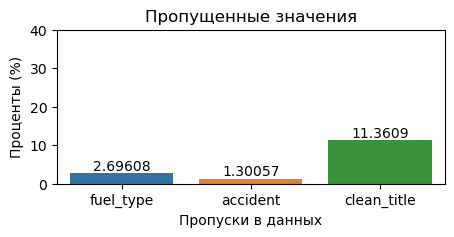

In [6]:
# выбираем не нулевые значения
missing_values = df.isnull().sum() / len(df) * 100
non_zero_missing_values = missing_values[missing_values > 0]
missing_values_df = non_zero_missing_values.reset_index()
missing_values_df.columns = ['Column', 'Percentage']

# Визуализация пропущенных значений
plt.figure(figsize=(5, 2))
ax = sns.barplot(x='Column', y='Percentage', data=missing_values_df, hue = 'Column')

sns.color_palette("hls", 8)
plt.title('Пропущенные значения')
plt.ylabel('Проценты (%)')
plt.xlabel('Пропуски в данных')
plt.ylim(0, 40)

# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
for i in range (len(missing_values_df)):
    ax.bar_label(ax.containers[i])
#plt.show()

#### Заполнение пропущенных значений

Столбцы fuel_type, accident, clean_title имеют процентное соотношение 2,70%,1,30%,11,36%, и все они являются категориальными столбцами
Варианты заполнения пропусков 

 Замена пропущенных значений наиболее часто встречающимися наблюдаемыми значениями категории в этом столбце.   KNN:заполнение  пропущенные значения на основе значений k-ближайших соседей    . Заполнение новым значением типа Unknown.от
В нашем случае fuel_type возьмем из engine.

accidentом)clean_titleтое название: в этих случаях использование пропущенных значенийNo report"Н Unknown"Неизвестно" гарантирует, что мы не ошибемся, предположив, что пропущенная запись означает "Нет аварии" или "Да, чистое название". Это может быть критично, поскольку история аварий напрямую влияет на цены на автомобили.tely.

In [7]:
# Заполняем пропуски accident на 'No Report'
df['accident'] = df['accident'].fillna('No Report')
dtest['accident'] = dtest['accident'].fillna('No Report')

# Заполняем пропуски clean_title на 'Unknown'
df['clean_title'] = df['clean_title'].fillna('Unknown')
dtest['clean_title'] = dtest['clean_title'].fillna('Unknown')

### Exploratory Data Analysis (EDA)

In [8]:
numeric_col=[]
object_col=[]
for column in df.columns:
    if df[column].dtype == 'int64':
        numeric_col.append(column)
    if df[column].dtype == 'object':
        object_col.append(column)
        
print(f"numric_col:{numeric_col}")
print(f"object_col:{object_col}")

numric_col:['model_year', 'milage', 'price']
object_col:['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


In [9]:
# Статистика 
df[numeric_col].describe()

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


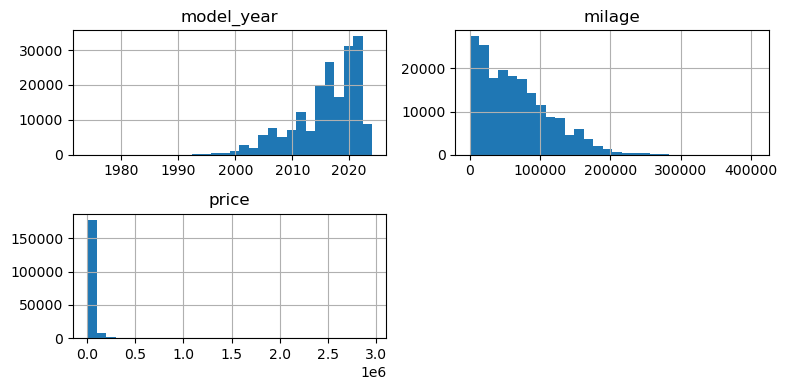

In [10]:
# Визуализация числовых значений
df[numeric_col].hist(bins=30, figsize=(8, 4))
plt.tight_layout()
plt.show()

model_year - график смещен влево. есть старые автомобли (1974 год). Заменим далее model_year на возраст автомобиля.
milage - сильно искажено. Гистограмма пробега показывает, что у большинства автомобилей пробег невелик (менее 150 000 км).
Крайние значения в столбце пробег (до 405 000 км) могут указывать на более старые автомобили или автомобили с очень интенсивным использованием.применим ле логаркк milageега, чтобы уменьшить перекос.

In [11]:
#Данные распределены ненормально. Применим логарифмическое преобразование к столбцам milage, price
df['log_milage'] = np.log1p(df['milage'])

#### Целевая переменная , выбросы и распределение
После логарифмических преобразований целевой переменнй наблюдаем, что распределение нормальное, имеются выбросы, которые будут мешать прогнозу

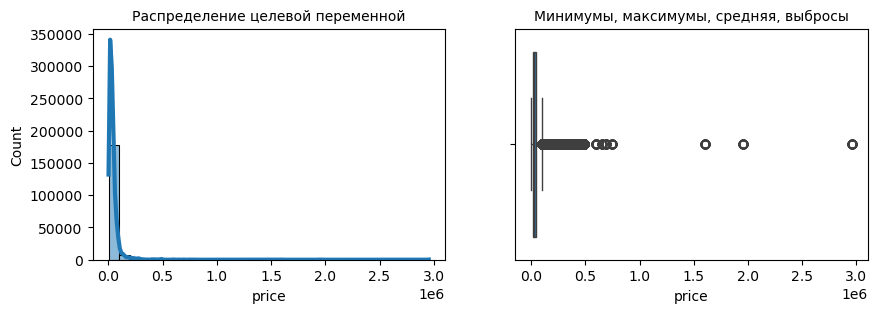

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10, 3))
sns.histplot( x = (df['price']),stat='count',  kde= True, bins = 30,line_kws={"lw": 3},ax = ax[0]).set_title('Распределение целевой переменной', fontsize=10)
sns.boxplot(x = (df['price']), ax = ax[1]).set_title("Минимумы, максимумы, средняя, выбросы", fontsize=10)
plt.show()

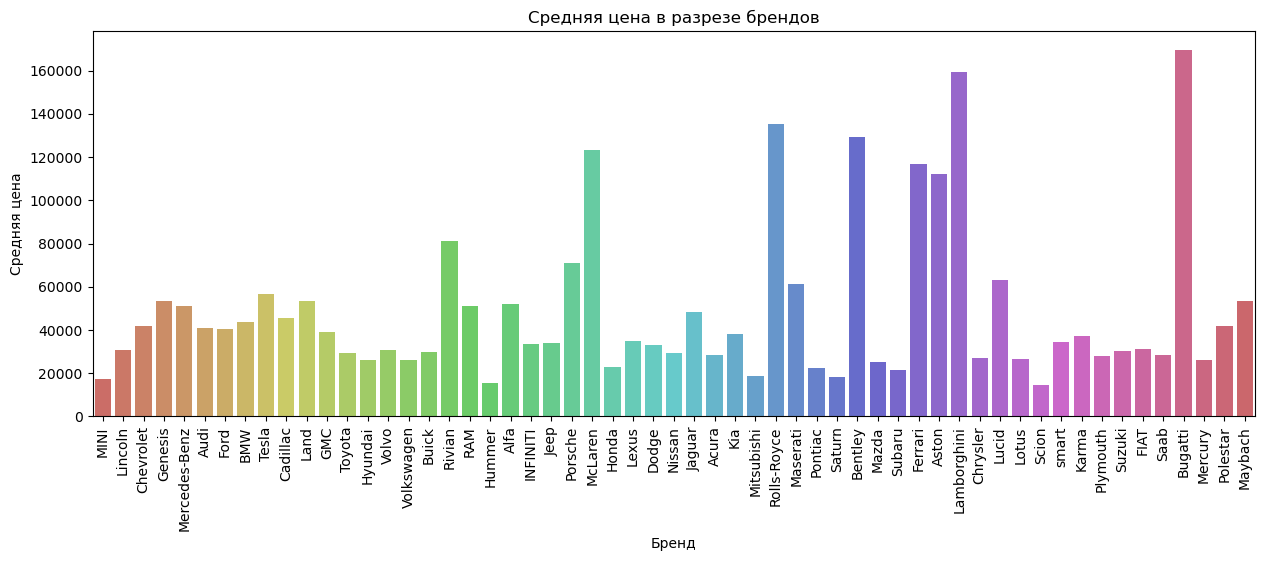

In [13]:

plt.figure(figsize=(15, 5))
sns.barplot(x='brand', y='price', data=df, errorbar=None, palette='hls', legend=False, hue = 'brand')
sns.color_palette("hls", 8)
plt.title('Средняя цена в разрезе брендов')
plt.xlabel('Бренд')
plt.ylabel('Средняя цена')
plt.xticks(rotation=90)  
plt.show()

C:\Users\yuril\AppData\Local\Temp\ipykernel_21768\3261872617.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, palette='hls', legend=False)


Text(0, 0.5, 'Средняя цена')

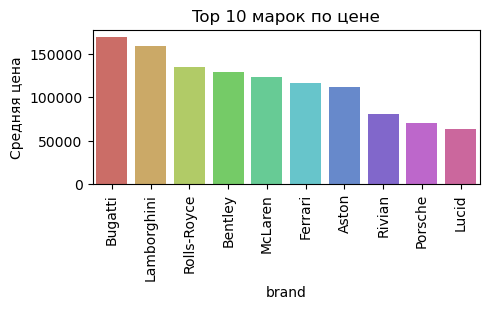

In [14]:
# Выберем 10 самых дорогих марок автомобилей
avg_price_by_brand = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10) 
plt.figure(figsize=(5, 2))
sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, palette='hls', legend=False)
l_brands = avg_price_by_brand.index.tolist()
l_brands = [s.lower() for s in l_brands]
plt.title('Top 10 марок по цене')
plt.xticks(rotation=90)
plt.ylabel('Средняя цена')

In [15]:
# посмотрим на уникальные значения категориальных переменных
unique_values = {col: df[col].nunique() for col in object_col}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")

brand: 57 unique values
model: 1897 unique values
fuel_type: 7 unique values
engine: 1117 unique values
transmission: 52 unique values
ext_col: 319 unique values
int_col: 156 unique values
accident: 3 unique values
clean_title: 2 unique values


In [16]:
def check_out(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR    
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return len(df)- len(df_out)

In [17]:
print ('кол-во выбросов по милям: ',check_out(df,'milage'))
print ('кол-во выбросов по цене: ',check_out(df,'price'))

кол-во выбросов по милям:  1766
кол-во выбросов по цене:  10880


In [18]:
df.describe()

,model_year,milage,price,log_milage
count,188533.000000,188533.000000,1.885330e+05,188533.000000
mean,2015.829998,65705.295174,4.387802e+04,10.656095
std,5.660967,49798.158076,7.881952e+04,1.150876
min,1974.000000,100.000000,2.000000e+03,4.615121
25%,2013.000000,24115.000000,1.700000e+04,10.090631
50%,2017.000000,57785.000000,3.082500e+04,10.964502
75%,2020.000000,95400.000000,4.990000e+04,11.465844
max,2024.000000,405000.000000,2.954083e+06,12.911645


#### Выводы по данным:

##### Категориальные переменные
    - большое кол-во уникальных значений в моделях, типа трансмисии, цветов. Необходмо сокращать кол-во уникальных значений или формировать новые переменные из существующих.
##### Выбросы :
    - пробег 1766/188533 - 0,93%. Вариант - удалить выбросы 
    - цена 10880/188533 - 5,77%. Выбросы по ценам объясняются люксовыми брендами. Ввести доп метрику по люксовым брендам. Удалить выбросы из тренировачного набора


#### Простая линейная модель зависимости цены от пробега 

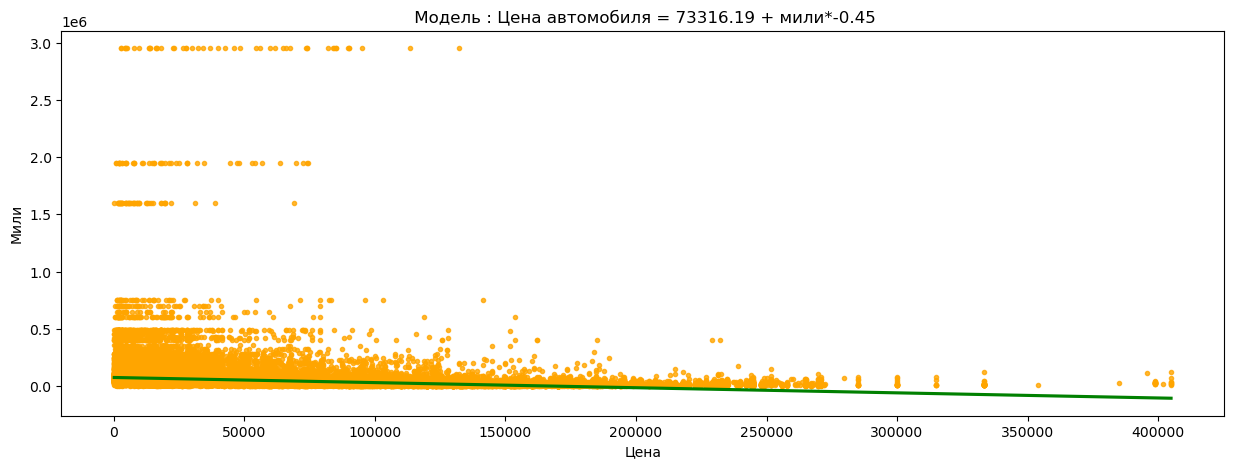

In [19]:
X = df[['milage']]
y = df[['price']]
reg_model = LinearRegression().fit(X, y)

plt.figure(figsize=(15, 5))
g = sns.regplot(x=X,y=y,scatter_kws={"color": "orange", "s": 9},ci=False,color="green")
g.set_title(f" Модель : Цена автомобиля = {round(reg_model.intercept_[0], 2)} + мили*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Мили")
g.set_xlabel("Цена")
plt.show()

## 3. Предобработка данных, удаление выбросов, заполнение пропусков

In [20]:
# Пропуски в данных
df.isnull().sum()

brand              0
model              0
model_year         0
milage             0
fuel_type       5083
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title        0
price              0
log_milage         0
dtype: int64

In [21]:
# предобработка данных
def prep_data(df):
    current_year = datetime.datetime.now().year
    df = df.copy()
    df.loc[(df['engine'].str.contains("Electric|electric|Dual Motor|Standard Range Battery")==True), 'fuel_type'] = 'Electric'
    df.loc[(df['engine'].str.contains("Gasoline|DOHC|TFSI")==True), 'fuel_type'] = 'Gasoline'
    df.loc[(df['engine'].str.contains("Flex Fuel")==True), 'fuel_type'] = 'Flex Fuel'
    df.loc[(df['brand']=='Tesla'), 'fuel_type'] = 'Electric'
    df['fuel_type'].fillna('Gasoline',inplace=True)
    df['fuel_type'] = df['fuel_type'].replace ('Plug-In Hybrid', 'Hybrid')
    df['fuel_type'] = df['fuel_type'].replace ('–', 'Gasoline')
    
    df['transmission'] = df['transmission'].str.lower()
    # Извлекаем horsepower, engine size
    df["hp"] = df["engine"].str.extract(r"(\d+\.\d+)HP", expand=False).astype(float)
    df['engine_size'] = df['engine'].str.extract(r'(\d+\.\d+)(?=L)').astype(float)
    #df['cyl'] = df['engine'].str.extract(r'(\d+)\s(Cylinder|V\d|Straight)')[0].astype(float)
    # Стандартизируем transmission
    df['transmission_type'] = df['transmission'].apply(lambda x: 
                                                       'manual' if 'm/t' in x or 'manual' in x or  'mt' in x else 
                                                       'automatic' if 'a/t' in x or 'automatic' in x or  'at' in x else 
                                                       'CVT' if 'CVT' in x else 
                                                       'Other')
    df['brand'] = df['brand'].str.lower()
    df['Luxury_Brand'] = df['brand'].apply(lambda x: 1 if x in l_brands else 0)
    df['Age'] = current_year - df['model_year']
    
    df[object_col] = df[object_col].astype("category")
    df.drop(['model_year', 'transmission','engine'], axis= 1 , inplace= True )   
    return df

In [22]:
# применяем предобработку данных
df = prep_data(df)
dtest = prep_data(dtest)

In [23]:
df.isnull().sum(), dtest.isnull().sum()

(brand                    0
 model                    0
 milage                   0
 fuel_type                0
 ext_col                  0
 int_col                  0
 accident                 0
 clean_title              0
 price                    0
 log_milage               0
 hp                   33259
 engine_size          14214
 transmission_type        0
 Luxury_Brand             0
 Age                      0
 dtype: int64,
 brand                    0
 model                    0
 milage                   0
 fuel_type                0
 ext_col                  0
 int_col                  0
 accident                 0
 clean_title              0
 hp                   22181
 engine_size           9407
 transmission_type        0
 Luxury_Brand             0
 Age                      0
 dtype: int64)

In [24]:
# заполняем пропуски mode ( mode посмотрели заранее )
df['hp'].fillna(300,inplace=True)
dtest['hp'].fillna(300,inplace=True)
df['engine_size'].fillna(3.0,inplace=True)
dtest['engine_size'].fillna(3.0,inplace=True)

In [25]:
df.isnull().sum(), dtest.isnull().sum()

(brand                0
 model                0
 milage               0
 fuel_type            0
 ext_col              0
 int_col              0
 accident             0
 clean_title          0
 price                0
 log_milage           0
 hp                   0
 engine_size          0
 transmission_type    0
 Luxury_Brand         0
 Age                  0
 dtype: int64,
 brand                0
 model                0
 milage               0
 fuel_type            0
 ext_col              0
 int_col              0
 accident             0
 clean_title          0
 hp                   0
 engine_size          0
 transmission_type    0
 Luxury_Brand         0
 Age                  0
 dtype: int64)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   brand              188533 non-null  category
 1   model              188533 non-null  category
 2   milage             188533 non-null  int64   
 3   fuel_type          188533 non-null  category
 4   ext_col            188533 non-null  category
 5   int_col            188533 non-null  category
 6   accident           188533 non-null  category
 7   clean_title        188533 non-null  category
 8   price              188533 non-null  int64   
 9   log_milage         188533 non-null  float64 
 10  hp                 188533 non-null  float64 
 11  engine_size        188533 non-null  float64 
 12  transmission_type  188533 non-null  object  
 13  Luxury_Brand       188533 non-null  int64   
 14  Age                188533 non-null  int64   
dtypes: category(7), float64(3), int64(

In [27]:
# удалим выбросы
def remove_outliers_iqr(df, column):   
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR    
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

df_no_outliers = remove_outliers_iqr(df, 'milage')
df_no_outliers = remove_outliers_iqr(df, 'log_milage')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'price')
df_no_outliers.reset_index(drop=True, inplace=True)

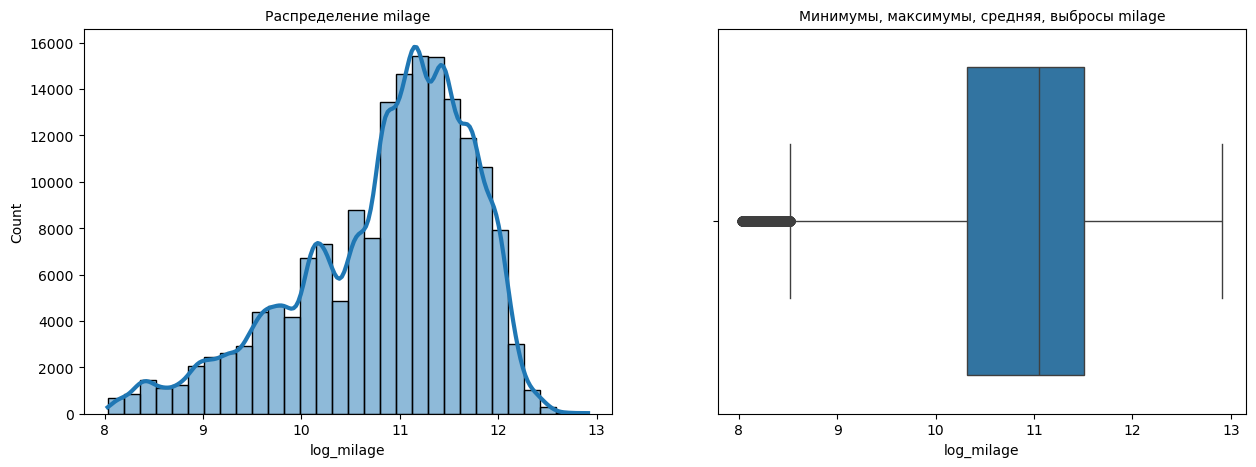

In [28]:
# смотрим еще раз выбросы и распределение
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.histplot(
    x = df_no_outliers['log_milage'],
    stat='count',  
    kde= True, 
    bins = 30,
    line_kws={"lw": 3},
    ax = ax[0]
    ).set_title('Распределение milage', fontsize=10)
sns.boxplot(
    x = df_no_outliers['log_milage'], 
    ax = ax[1]).set_title("Минимумы, максимумы, средняя, выбросы milage", fontsize=10)
plt.show()

In [29]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171112 entries, 0 to 171111
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   brand              171112 non-null  category
 1   model              171112 non-null  category
 2   milage             171112 non-null  int64   
 3   fuel_type          171112 non-null  category
 4   ext_col            171112 non-null  category
 5   int_col            171112 non-null  category
 6   accident           171112 non-null  category
 7   clean_title        171112 non-null  category
 8   price              171112 non-null  int64   
 9   log_milage         171112 non-null  float64 
 10  hp                 171112 non-null  float64 
 11  engine_size        171112 non-null  float64 
 12  transmission_type  171112 non-null  object  
 13  Luxury_Brand       171112 non-null  int64   
 14  Age                171112 non-null  int64   
dtypes: category(7), float64(3), int64(

#### Готовим данные, кодируем категориальные переменные 

In [30]:
# Готовим данные
df_for_model = df_no_outliers.groupby('price').sample(frac=1, random_state= 1).reset_index(drop = True)
X = df_for_model.drop(columns=[ 'price', 'milage',], axis =1)
y = df_for_model['price']

# Применяем StandardScaler к количественным колонкам
from sklearn.preprocessing import StandardScaler
numerical_columns = ['log_milage','hp', 'engine_size', 'Age', 'Luxury_Brand']
categorical_columns = ['brand', 'model', 'fuel_type', 'ext_col', 'int_col', 'accident', 'clean_title', 'transmission_type' ]
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# кодируем категориальные переменные
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for feature in categorical_columns:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
    label_encoders[feature] = le  
# разделяем данные на тренировачные и тестовые     
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state = 8)

In [31]:
X_train.corr().style.background_gradient(cmap = 'coolwarm')

,brand,model,fuel_type,ext_col,int_col,accident,clean_title,log_milage,hp,engine_size,transmission_type,Luxury_Brand,Age
brand,1.000000,-0.021782,-0.075351,0.005863,0.000383,-0.001778,-0.019388,-0.001935,-0.078364,-0.106130,0.023994,0.251430,0.024919
model,-0.021782,1.000000,-0.039730,0.008152,0.080187,-0.013828,-0.052144,0.020303,-0.026345,0.014281,0.023282,-0.167854,-0.006066
fuel_type,-0.075351,-0.039730,1.000000,-0.025140,-0.036983,0.006287,-0.044854,0.000166,-0.109734,-0.162517,0.029611,0.018147,0.057606
ext_col,0.005863,0.008152,-0.025140,1.000000,0.068162,-0.014258,0.017137,0.031565,-0.031843,-0.012242,-0.000194,-0.004812,0.028736
int_col,0.000383,0.080187,-0.036983,0.068162,1.000000,-0.006959,-0.080754,-0.037686,-0.006064,-0.008693,-0.005368,-0.019637,-0.012152
accident,-0.001778,-0.013828,0.006287,-0.014258,-0.006959,1.000000,-0.099080,-0.282786,0.150289,0.007856,0.000962,0.045490,-0.232986
clean_title,-0.019388,-0.052144,-0.044854,0.017137,-0.080754,-0.099080,1.000000,0.265750,0.078996,0.088802,-0.014693,-0.008043,0.262637
log_milage,-0.001935,0.020303,0.000166,0.031565,-0.037686,-0.282786,0.265750,1.000000,-0.323777,-0.019219,0.075969,-0.102191,0.607310
hp,-0.078364,-0.026345,-0.109734,-0.031843,-0.006064,0.150289,0.078996,-0.323777,1.000000,0.529510,-0.105349,0.156290,-0.303542
engine_size,-0.106130,0.014281,-0.162517,-0.012242,-0.008693,0.007856,0.088802,-0.019219,0.529510,1.000000,-0.000847,-0.000487,0.042660


#### Выводы
##### Есть корреляция между engine_size и hp, между Age и log_milage. Они обяснимы, не удаляем пока никакие столбцы


#### Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error

poly = PolynomialFeatures(degree=4)

X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
# Fit the model to the data
poly.fit(X_poly_train, y_train)
lin = LinearRegression()
lin.fit(X_poly_train, y_train)

y_pred = lin.predict(X_poly_test)

print("Root Mean squared error: ", root_mean_squared_error(y_test, y_pred))

Root Mean squared error:  12731.7527302211


#### Stepwise Regression

In [33]:
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10)
selector = selector.fit(X, y)

# Print the selected features
print(X.columns[selector.support_])
lst = X.columns[selector.support_]

# Выберем, только предложенные столбцы для модели 
Xs = X[lst]
Xs_train, Xs_test, ys_train, ys_test = train_test_split( X, y, test_size=0.25, random_state = 8)
# Create a decision tree regression model
model = LinearRegression()
# Fit the model to the data
model.fit(Xs_train, ys_train)

# Predict the response for a new data point
ys_pred = model.predict(Xs_test)

print("Root Mean squared error: ", root_mean_squared_error(ys_test, ys_pred))

Index(['brand', 'fuel_type', 'accident', 'clean_title', 'log_milage', 'hp',
       'engine_size', 'transmission_type', 'Luxury_Brand', 'Age'],
      dtype='object')
Root Mean squared error:  13409.743247556724


#### Decision Tree Regression

In [34]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
 
# Create a decision tree regression model
model = DecisionTreeRegressor()
# Fit the model to the data
model.fit(X_train, y_train)

# Predict the response for a new data point
y_pred = model.predict(X_test)
print("Root Mean squared error: ", root_mean_squared_error(y_test, y_pred))

Root Mean squared error:  17538.176276684502


In [35]:
# Попробуем подобрать гиперпараметры для Decision Tree Regression
param_grid = {
 'max_depth': [30, 50, 70, 100, None],
 'max_features': ["sqrt", "log2", None],
 'min_samples_leaf': [1, 3, 5],
 'min_samples_split': [2, 3, 4]
 }

dtr = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 10, verbose =2, scoring='neg_mean_squared_error', n_jobs = -1)
grid_search.fit(X_train, y_train)
best_dtree_reg = grid_search.best_estimator_
y_pred = best_dtree_reg.predict(X_test)
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")
print("Root Mean squared error: ", root_mean_squared_error(y_test, y_pred))

<IPython.core.display.Javascript object>

Fitting 10 folds for each of 135 candidates, totalling 1350 fits
Best parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 4}
Root Mean squared error:  13797.400986426495


#### Random Forest Regression

In [36]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
 
model = RandomForestRegressor(n_estimators=50, verbose=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Root Mean squared error: ", root_mean_squared_error(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   30.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Root Mean squared error:  12882.951577238644


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


In [37]:
# Попробуем подобрать гиперпараметры для RandomForestRegressor
param_grid = [
    {'criterion':['squared_error'], 'max_depth':[None, 2,5,10], 'max_leaf_nodes':[None,2,5,10]}]
rfr = RandomForestRegressor()
grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring = 'neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)
best_rfr = grid_search.best_estimator_
y_pred = best_rfr.predict(X_test)
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")
print("Root Mean squared error: ", root_mean_squared_error(y_test, y_pred))

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None; total time=  57.2s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None; total time=  49.9s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None; total time=  49.6s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None; total time=  49.5s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None; total time=  49.6s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=2; total time=   4.4s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=2; total time=   4.3s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=2; total time=   4.6s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=2; total time=   4.4s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=2; total time=   4.4s
[CV] END criterion=squared_error, max_depth=None, max_

#### Ridge Regression

In [38]:
# Ridge
from sklearn.linear_model import Ridge

model = Ridge(alpha=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Root Mean squared error: ", root_mean_squared_error(y_test, y_pred))

Root Mean squared error:  13409.743190678468


In [39]:
# Попробуем подобрать гиперпараметры для Ridge

alpha_values = {'alpha':[0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 1, 2, 3,5, 7, 9, 11]}

ridge = Ridge()
grid_search = GridSearchCV(ridge, alpha_values, scoring = 'neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_

y_pred = best_ridge.predict(X_test)
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")
print("Root Mean squared error: ", root_mean_squared_error(y_test, y_pred))

<IPython.core.display.Javascript object>

Best parameters: {'alpha': 11}
Root Mean squared error:  13409.743132475902


#### Lasso Regression

In [40]:
# Lasso   
from sklearn.linear_model import Lasso
 
model = Lasso(alpha=7)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Root Mean squared error: ", root_mean_squared_error(y_test, y_pred))

Root Mean squared error:  13409.807904689356


#### ElasticNet Regression

In [41]:
# ElasticNet
from sklearn.linear_model import ElasticNet
 
# Create an elastic net regression model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Root Mean squared error: ", root_mean_squared_error(y_test, y_pred))

Root Mean squared error:  13415.416847595305


In [42]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print("Root Mean squared error: ", root_mean_squared_error(y_test, y_pred))

Root Mean squared error:  15166.428275502336


In [43]:
from catboost import CatBoostRegressor

# Initialize and train CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.2, depth=4, verbose=0, loss_function='RMSE')  
catboost_model.fit(X_train, y_train)

y_pred = catboost_model.predict(X_test)
print("Root Mean squared error: ", root_mean_squared_error(y_test, y_pred))

Root Mean squared error:  12314.398261749364


In [44]:
def cat_opt(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }
    model = CatBoostRegressor(**params, silent=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [45]:
study = optuna.create_study(direction='minimize')
study.optimize(cat_opt, n_trials=40)

[I 2025-01-19 18:56:27,030] A new study created in memory with name: no-name-ad559bca-6fc7-47ea-8040-c0131739fba0
C:\Users\yuril\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-01-19 18:56:34,448] Trial 0 finished with value: 13862.284858526406 and parameters: {'learning_rate': 0.0014664204125291653, 'depth': 3, 'subsample': 0.5335717897553427, 'colsample_bylevel': 0.8806539308880275, 'min_data_in_leaf': 27}. Best is trial 0 with value: 13862.284858526406.
C:\Users\yuril\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-01-19 18:56:39,869] Trial 1 finished with value: 12807.20237

In [46]:
# попробуем подобрать параметры с помощью GridSearchCV
# from catboost import CatBoostRegressor
# cat_reg = CatBoostRegressor(random_state=42)

# catBoostRegressor параметры
# params_grid = {
#    'num_leaves': [7, 14, 21, 28, 31, 50],
#    'learning_rate': [0.5, 0.2, 0.1, 0.01, 0.001],
#    'max_depth': [-1, 3, 5],
#    'n_estimators': [50, 100, 200, 500]
#    }
# Create instance of GridSearchCV Model
# grid_search = GridSearchCV(cat_reg, params_grid, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X_train, y_train)

In [47]:
#grid_search.best_params_

{'alpha': 11}

In [48]:
catboost_model = CatBoostRegressor( learning_rate=0.2, max_depth=5, n_estimators=500, loss_function='RMSE', num_leaves=31, min_data_in_leaf = 81 )  
catboost_model.fit(X_train, y_train)

y_pred = catboost_model.predict(X_test)
print("Root Mean squared error: ", root_mean_squared_error(y_test, y_pred))


0:	learn: 18082.0682769	total: 17.7ms	remaining: 8.86s
1:	learn: 16579.7898556	total: 32.9ms	remaining: 8.19s
2:	learn: 15465.1312316	total: 46.1ms	remaining: 7.63s
3:	learn: 14664.9404179	total: 58.6ms	remaining: 7.27s
4:	learn: 14086.1143025	total: 70.1ms	remaining: 6.94s
5:	learn: 13698.0445004	total: 81.6ms	remaining: 6.72s
6:	learn: 13414.2505244	total: 93.6ms	remaining: 6.59s
7:	learn: 13206.4716575	total: 105ms	remaining: 6.44s
8:	learn: 13054.6940820	total: 116ms	remaining: 6.31s
9:	learn: 12943.3668066	total: 126ms	remaining: 6.18s
10:	learn: 12860.4271747	total: 137ms	remaining: 6.1s
11:	learn: 12801.7321406	total: 148ms	remaining: 6.03s
12:	learn: 12752.7800797	total: 160ms	remaining: 5.98s
13:	learn: 12715.9563824	total: 174ms	remaining: 6.03s
14:	learn: 12686.0523562	total: 190ms	remaining: 6.15s
15:	learn: 12662.7458803	total: 201ms	remaining: 6.09s
16:	learn: 12637.3408498	total: 212ms	remaining: 6.03s
17:	learn: 12622.1901747	total: 224ms	remaining: 5.99s
18:	learn: 126

#### Support Vector Regression

In [49]:
# SVR
from sklearn.svm import SVR
 

model = SVR(kernel='poly')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Root Mean squared error: ", root_mean_squared_error(y_test, y_pred))

Root Mean squared error:  20491.850817813858


#### Построим простую сеть на Keras

In [50]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import backend as K
from keras.losses import mean_squared_error

In [51]:
def r_mean_squared_error(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

In [52]:
# простая модель 
from keras import regularizers
model=Sequential()
model.add(Dense(units = 200, kernel_initializer = "uniform", activation = "relu", input_dim =13))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 128, kernel_initializer = "uniform", activation = "relu"))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 1, kernel_initializer = "uniform", activation = "relu"))
model.compile(optimizer = "rmsprop", loss = r_mean_squared_error)

C:\Users\yuril\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 200)                 │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          25,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,657 (111.94 KB)

 Trainable params: 28,657 (111.94 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Test Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (128334, 13) (128334,)
Test Data Shape: (42778, 13) (42778,)


In [55]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) 
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.keras', save_best_only=True, monitor='val_loss')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
history=model.fit(X_train,y_train,batch_size=1000,epochs=50,validation_data=(X_test,y_test),verbose=1, callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 27985.0957 - val_loss: 18873.3027
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18699.0039 - val_loss: 18137.4688
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18054.6523 - val_loss: 17625.0117
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 17604.0215 - val_loss: 17062.2754
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 17062.4922 - val_loss: 16421.5078
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 16364.3262 - val_loss: 15480.7422
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 15240.7344 - val_loss: 13892.0068
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13555.2920 - val_loss: 12142.4512
Epoch 9/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11829.2646 - val_loss: 11117.0000
Epoch 10/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 10983.5176 - val_loss: 10391.4326
Epoch 11/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss

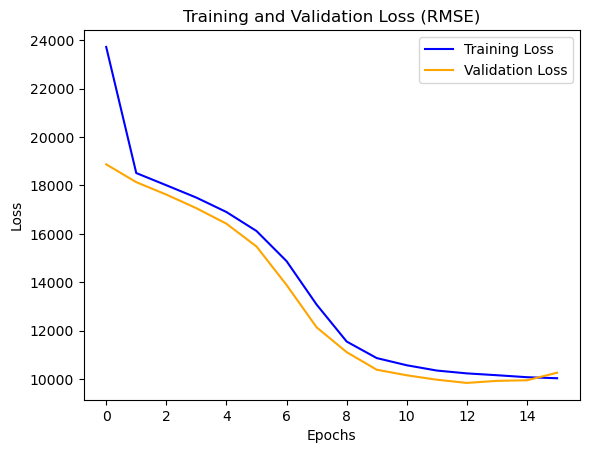

In [57]:
# Настроим Легенду
plt.plot(history.history['loss'], label='Training Loss', color='b')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (RMSE)')
plt.legend()

plt.show()

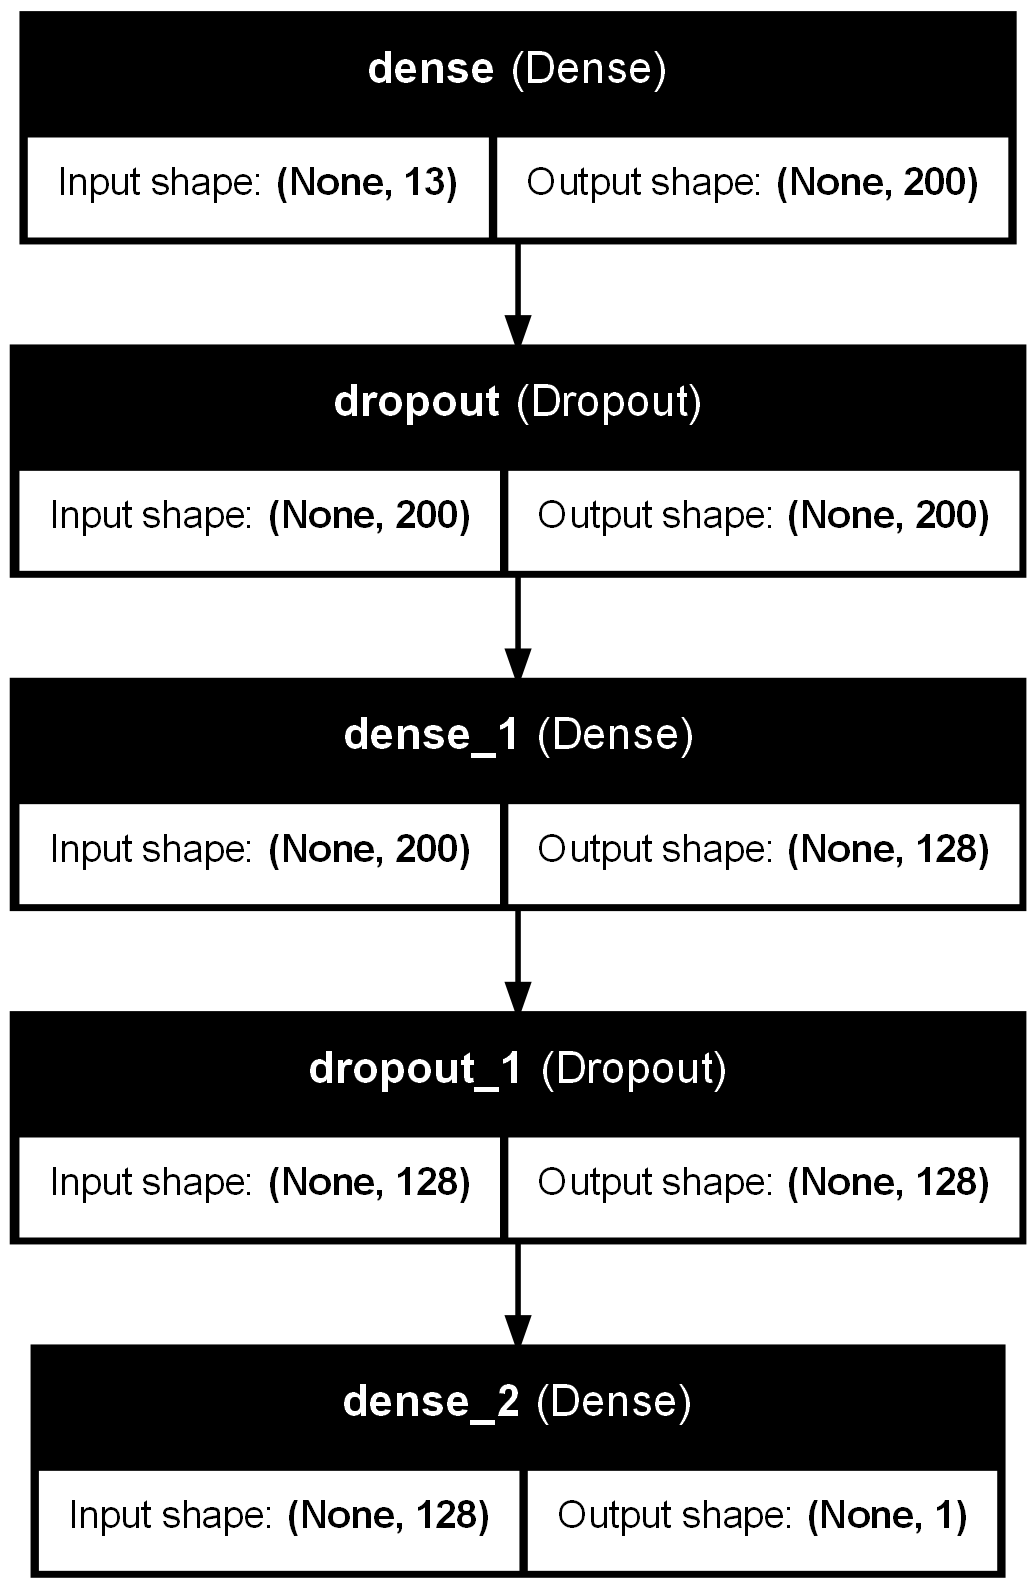

In [58]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [59]:
y_pred = model.predict(X_test).squeeze()
print("Root Mean squared error: ", root_mean_squared_error(y_test, y_pred))

1337/1337 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step
Root Mean squared error:  13773.880605643579
